#### Flight Price Prediction

###### Import Libraries

In [839]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder,StandardScaler

import warnings
warnings.filterwarnings('ignore')

###### Load Dataset

In [840]:
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv('E:\Data Trained_ Training\FlipRobo\Flight Price Project\BLR_DEL.csv')

###### Dimension of Data

###### Train Dataset

In [841]:
df.shape

(10683, 9)

*Observation :*<br>*In Dataset there are 10683 rows and 9 columns*

###### Sample of Data

In [842]:
df.head()

,Airline,Date,Source,Destination,Depart,Arr,Duration,Total stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,3/22/2021 1:10,2h 50m,non-stop,3897
1,Air India,1/5/2019,Kolkata,Banglore,5:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/6/2019,Delhi,Cochin,9:25,6/10/2021 4:25,19h,2 stops,13882
3,IndiGo,12/5/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,1/3/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


###### Brief about Data

In [843]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      10683 non-null  object
 1   Date         10683 non-null  object
 2   Source       10683 non-null  object
 3   Destination  10683 non-null  object
 4   Depart       10683 non-null  object
 5   Arr          10683 non-null  object
 6   Duration     10683 non-null  object
 7   Total stops  10682 non-null  object
 8   Price        10683 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 751.3+ KB


*Observation :*<br>*In Dataset there are 1 int type column and 7 object type column*
<br>*one column  not have 10683 Non null values means have missing value*

###### Statistical Summary of Data

###### ---for numerical variable

In [844]:
df.describe(exclude='object')

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


###### ---for Categorical variable

In [845]:
df.describe(include=[object]) 

,Airline,Date,Source,Destination,Depart,Arr,Duration,Total stops
count,10683,10683,10683,10683,10683,10683,10683,10682
unique,12,40,5,6,222,1343,368,5
top,Jet Airways,18/05/2019,Delhi,Cochin,18:55,19:00,2h 50m,1 stop
freq,3849,504,4537,4537,233,423,550,5625


###### check for unique values in columns

In [846]:
df.nunique()

Airline          12
Date             40
Source            5
Destination       6
Depart          222
Arr            1343
Duration        368
Total stops       5
Price          1870
dtype: int64

*Observation :*<br>*In Dataset Airline,Source, Destination,Total_stops columns
are categorical and rest are countinuos*

###### check for missing values in columns

In [847]:
df.isnull().sum()

Airline        0
Date           0
Source         0
Destination    0
Depart         0
Arr            0
Duration       0
Total stops    1
Price          0
dtype: int64

In [848]:
print("Total missing values :",df.isnull().sum().sum())

Total missing values : 1


###### check for duplicate rows

In [849]:
sum(df.duplicated())

220

*Observation :*<br>*Dataset have 220 Duplicate rows*

###### check for zeros in columns

In [850]:
print('Total zeros in Dataset:', df[df==0].count().sum())

Total zeros in Dataset: 0


*Observation :*<br>*In Dataset there are no zero as values*

###### Identification of variables

###### check for numerical variables 

In [851]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  1


In [852]:
for feature in numerical_features:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is Price and number of numerical are 1870


In [853]:
df[numerical_features].head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


###### check for categorical variable

In [854]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of Categorical variables: ', len(categorical_features))

Number of Categorical variables:  8


In [855]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Airline and number of categories are 12
The feature is Date and number of categories are 40
The feature is Source and number of categories are 5
The feature is Destination and number of categories are 6
The feature is Depart and number of categories are 222
The feature is Arr and number of categories are 1343
The feature is Duration and number of categories are 368
The feature is Total stops and number of categories are 6


In [856]:
df[categorical_features].head()

,Airline,Date,Source,Destination,Depart,Arr,Duration,Total stops
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,3/22/2021 1:10,2h 50m,non-stop
1,Air India,1/5/2019,Kolkata,Banglore,5:50,13:15,7h 25m,2 stops
2,Jet Airways,9/6/2019,Delhi,Cochin,9:25,6/10/2021 4:25,19h,2 stops
3,IndiGo,12/5/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop
4,IndiGo,1/3/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop


###### ---check for binary variable

In [857]:
binary_feature=[feature for feature in categorical_features if len(df[feature].unique())==2 or len(df[feature].unique())<2 and feature not in date_feature]
print("Binary Variables Count: {}".format(len(binary_feature)))

Binary Variables Count: 0


###### ---check for nominal variable

In [858]:
nominal_feature=[feature for feature in categorical_features if feature not in binary_feature]
print("Nominal feature Count {}".format(len(nominal_feature)))

Nominal feature Count 8


In [859]:
for feature in nominal_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is Airline and number of numerical are 12
The feature is Date and number of numerical are 40
The feature is Source and number of numerical are 5
The feature is Destination and number of numerical are 6
The feature is Depart and number of numerical are 222
The feature is Arr and number of numerical are 1343
The feature is Duration and number of numerical are 368
The feature is Total stops and number of numerical are 6


In [860]:
#nominalfeature=['Gender','Married','Dependents','Self_Employed','Property_Area']
#for feature in nominal_feature :
#    print(feature," : ", df[feature].unique())

In [861]:
df[nominal_feature].head()

,Airline,Date,Source,Destination,Depart,Arr,Duration,Total stops
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,3/22/2021 1:10,2h 50m,non-stop
1,Air India,1/5/2019,Kolkata,Banglore,5:50,13:15,7h 25m,2 stops
2,Jet Airways,9/6/2019,Delhi,Cochin,9:25,6/10/2021 4:25,19h,2 stops
3,IndiGo,12/5/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop
4,IndiGo,1/3/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop


###### check for cardinality

Text(0.5, 1.0, 'Cardinality')

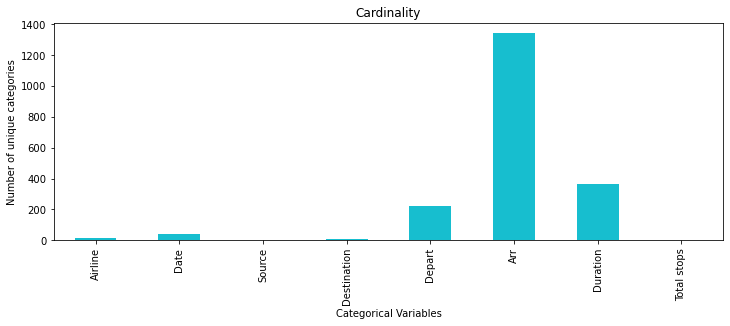

In [862]:
df[categorical_features].nunique().plot.bar(figsize=(12,4),color='#17becf')
plt.ylabel('Number of unique categories')
plt.xlabel('Categorical Variables')
plt.title('Cardinality')

###### check for outliers

<AxesSubplot:>

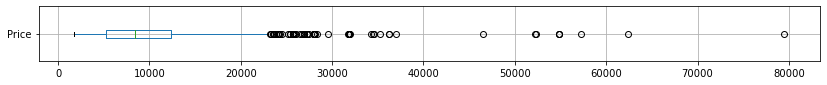

In [863]:
df.boxplot(column='Price', figsize=(14,1),vert=False)

*Observation :*<br>*In Dataset there are outliers in Price column*

###### check for skewness

In [864]:
print(df.skew())

Price    1.812552
dtype: float64


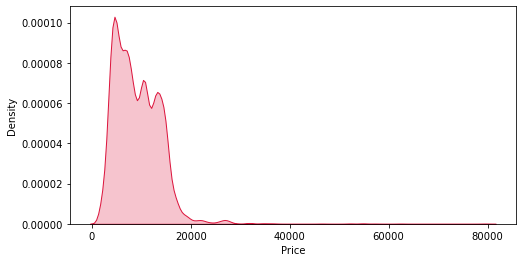

In [865]:
#Visualization of Skewness (numerical variable)
plt.figure(figsize=(8,4))
sns.kdeplot(df['Price'],color='crimson',shade=True)
plt.show()


###### Identify Target and Feature Variable

*Prediction-*<br>*Flight Price Prediction*

*Targe Variable (Depaendent Features)* <br>            *-Price* <br>
*Predictors (Independent Features)*<br>                 *- All variables* 

###### EDA

###### 1. Airline variable

<AxesSubplot:>

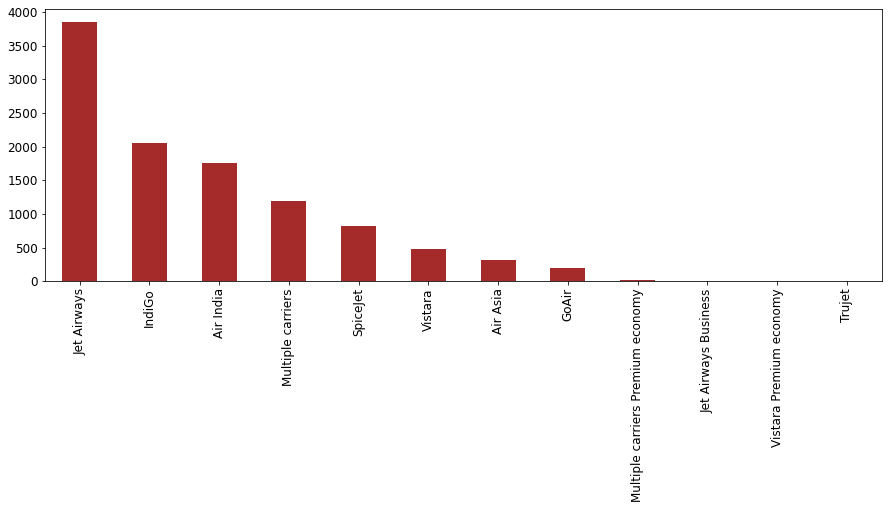

In [618]:
df['Airline'].value_counts().plot(kind = "bar",fontsize=12,figsize=(15,5),color='brown')

*Observation :*<br>*In Airline column Jet Airways have max count*

###### 2. Date_of_Journey variable

<AxesSubplot:>

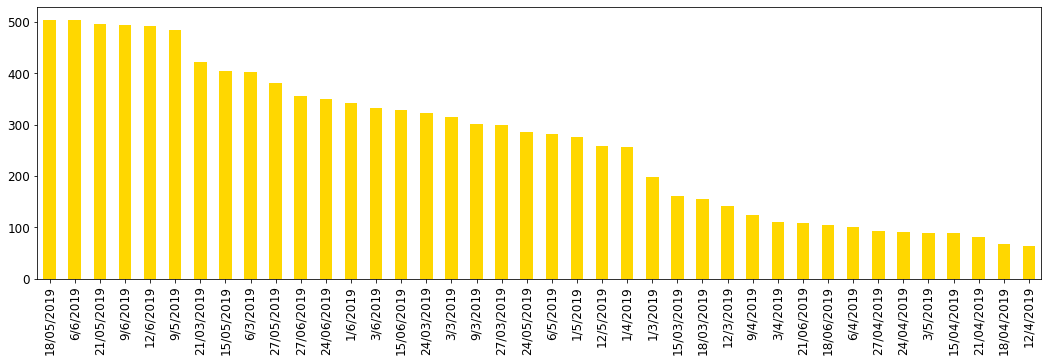

In [238]:
df['Date'].value_counts().plot(kind = "bar",fontsize=12,figsize=(18,5),color='gold')

*Observation :*<br>*In Date column max count is between 9 may to 12 june*

###### 3. Source variable

<AxesSubplot:ylabel='Source'>

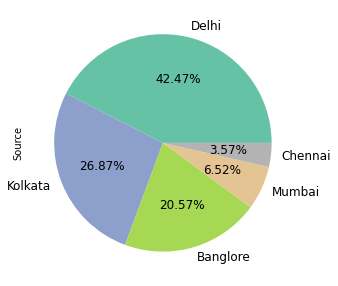

In [239]:
df['Source'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='Set2')

*Observation :*<br>*In Source column max (42%) flight source is Delhi*
<br>*banglore 20%, kolkata 26% is 2nd max count*
<br>*Mumbai,Chennai have least source flights*

###### 4. Destination variable

<AxesSubplot:ylabel='Destination'>

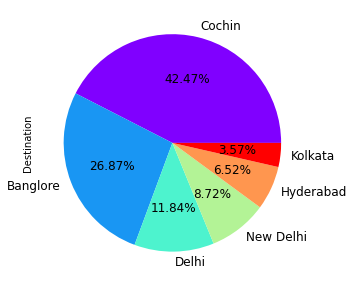

In [240]:
df['Destination'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='rainbow')

*Observation :*<br>*In 42% fight have Cochin Destination,26% have Banglore,11% have Delhi, 8% New delhi,6% hydrabad, 3% Kolkata*

###### 5. Departure Time variable

<AxesSubplot:>

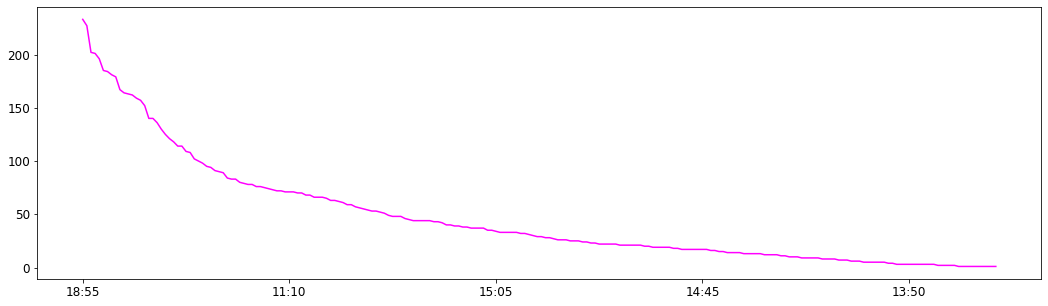

In [241]:
df_train['Depart'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='magenta')

*Observation :*<br>*In Dep_time column max count is 18:55,11:10,10:10*
<br>*rest have least count*

###### 6. Arrival Time variable

<AxesSubplot:>

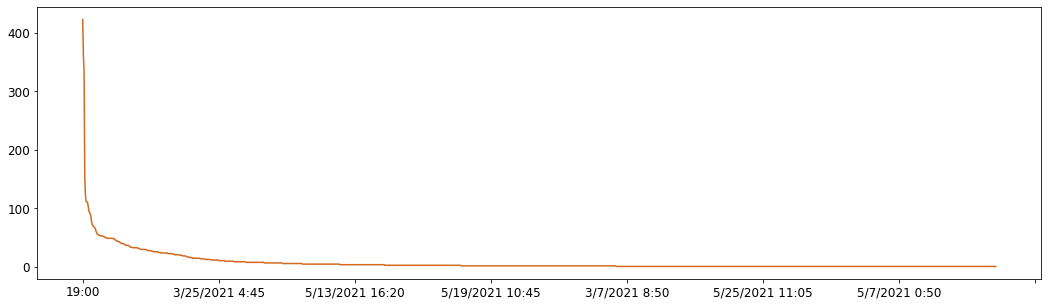

In [242]:
df['Arr'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='Chocolate')

*Observation :*<br>*In Arrival_Time column 19:00 have max count and rest have least count*

###### 7. Duration variable

<AxesSubplot:>

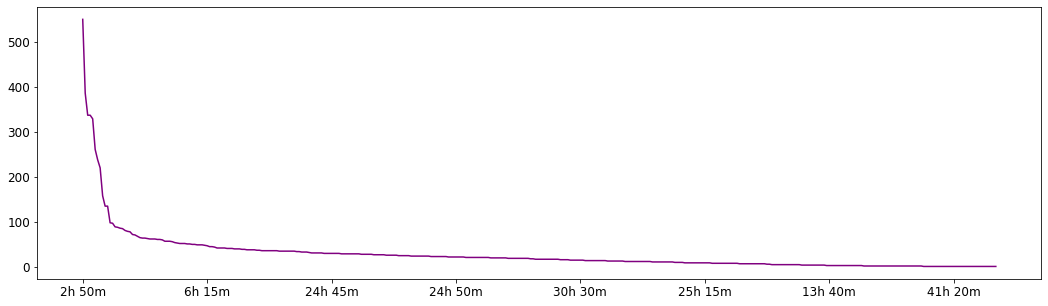

In [243]:
df['Duration'].value_counts().plot(kind = "line",fontsize=12,figsize=(18,5),color='purple')

*Observation :*<br>*In Duration max flight source to destination reaching hime is 2h50 min*
<br>*rest have least count*

###### 8. Total Stops variable

<AxesSubplot:ylabel='Total stops'>

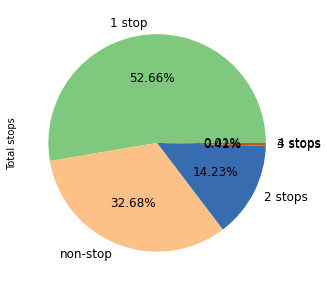

In [244]:
df['Total stops'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='Accent')

<AxesSubplot:>

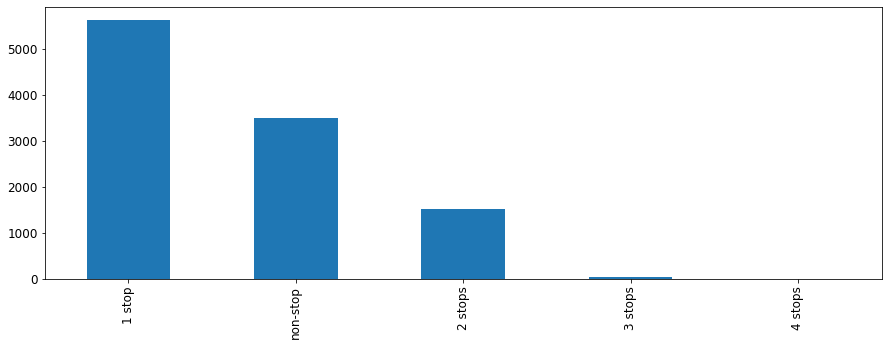

In [245]:
df['Total stops'].value_counts().plot(kind = "bar",fontsize=12,figsize=(15,5))

*Observation :*<br>*In Total_stops column 52% flight have only 1 stop,14% flight have 2 stops, 
0.02% flight have 3 stops,32% flight have Non-stops*

*Observation :*<br>*maximum count is of no information, only meal include/no check in baggage etc haves least info*

###### 9. Price variable

<AxesSubplot:>

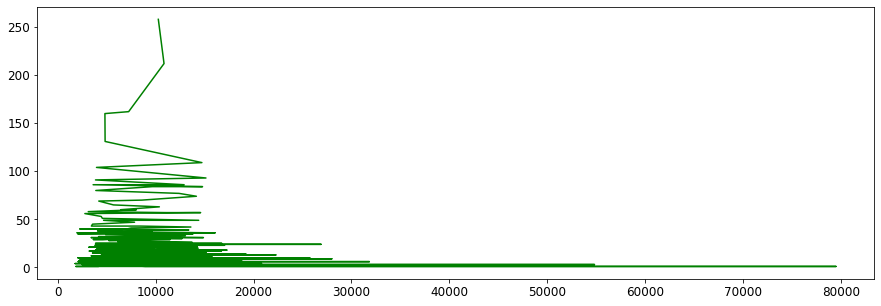

In [246]:
df['Price'].value_counts().plot(kind = "line",fontsize=12,figsize=(15,5),color='green')

*Observation :*<br>*In Price column maximum between 0 to 20000  and rest have 25000 to 80000 least count*

###### 1.Price Vs 
            Airline
            Date
            Source
            Destination
            Depart
            Arr
            Duration
            Total_Stops

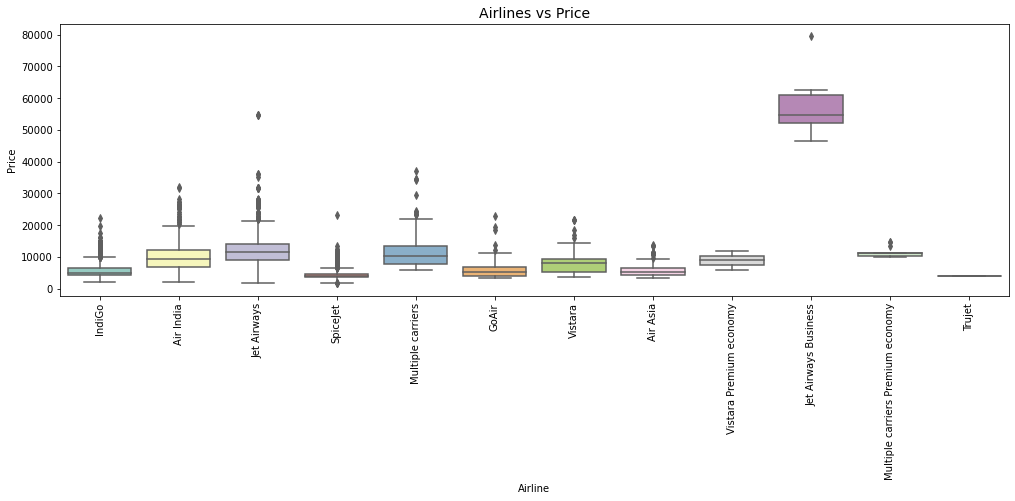

In [247]:
plt.figure(figsize=(17,5))
sns.boxplot(df['Airline'], df['Price'], palette='Set3')
plt.title('Airlines vs Price', size=14)
plt.xticks(rotation=90)
plt.show()

*Observation :*<br>*All Airlines have approx same price but jet Airways Business price is hightest*

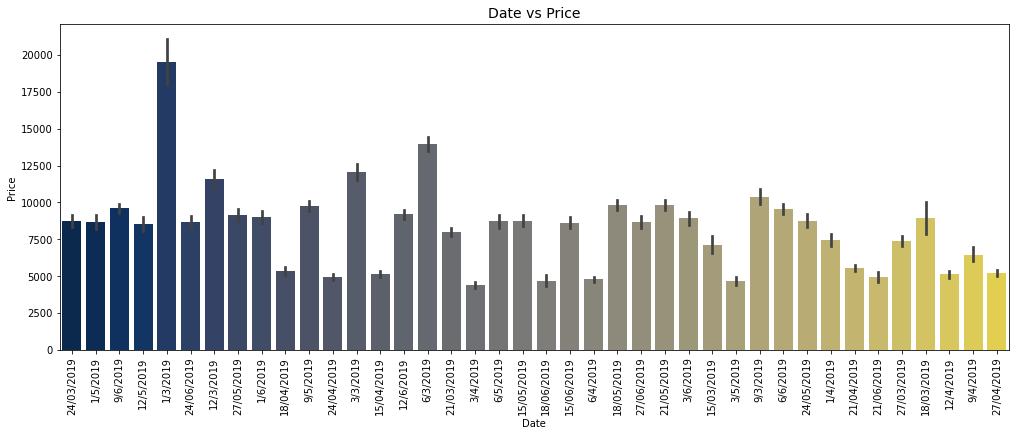

In [248]:
plt.figure(figsize=(17,6))
sns.barplot(df['Date'], df['Price'], palette='cividis')
plt.title('Date vs Price', size=14)
plt.xticks(rotation=90)
plt.show()

*Observation :*<br>*price of the flight in least in the month of april and max in the month of march*
<br>*fight ticket price is high in the starting date of the month 1 to 15 and price is low on last days of the month*

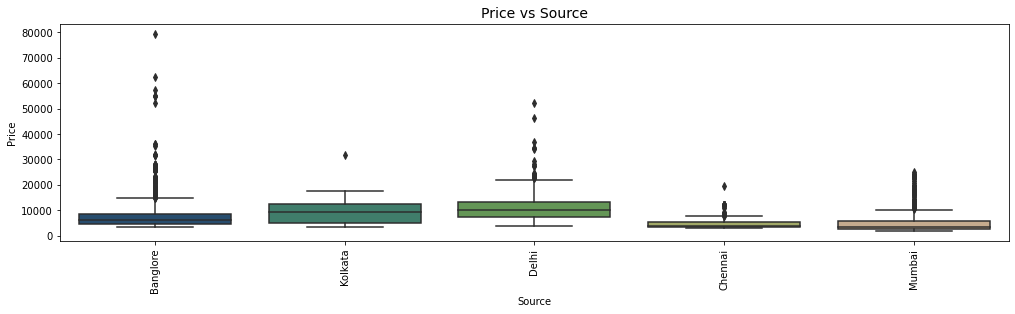

In [249]:
plt.figure(figsize=(17,4))
sns.boxplot(df['Source'], df['Price'], palette='gist_earth')
plt.title('Price vs Source', size=14)
plt.xticks(rotation=90)
plt.show()


*Observation :*<br>*Source delhi have max ticket price. and the other sources have approx same price for ticket*

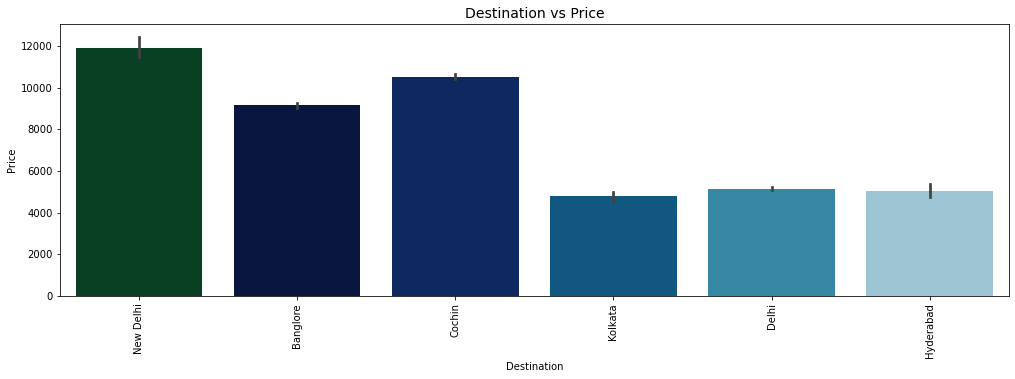

In [250]:
plt.figure(figsize=(17,5))
sns.barplot(df['Destination'], df['Price'], palette='ocean')
plt.title('Destination vs Price', size=14)
plt.xticks(rotation=90)
plt.show()


*Observation :*<br>*New Delhi, Banglore and Cochin have max ticket price and rest have min*

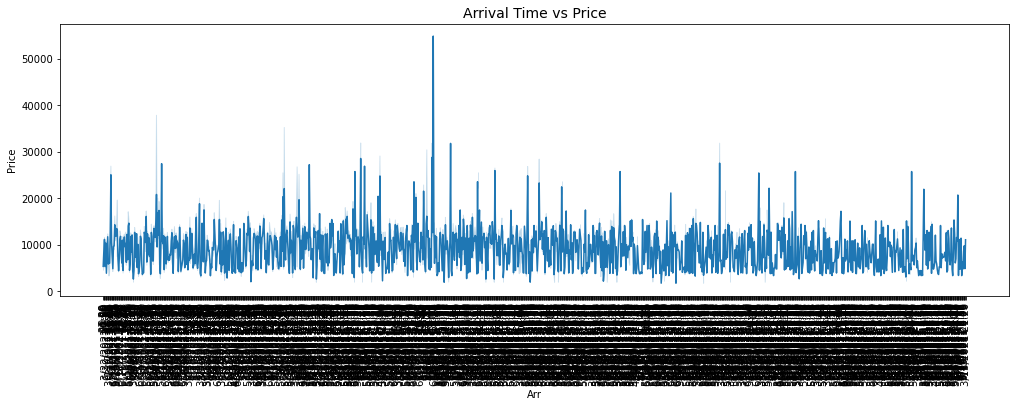

In [251]:
plt.figure(figsize=(17,5))
sns.lineplot(df_train['Arr'], df_train['Price'], palette='inferno')
plt.title('Arrival Time vs Price', size=14)
plt.xticks(rotation=90)
plt.show()

*Observation :*<br>*price is approx same for every arrival time*

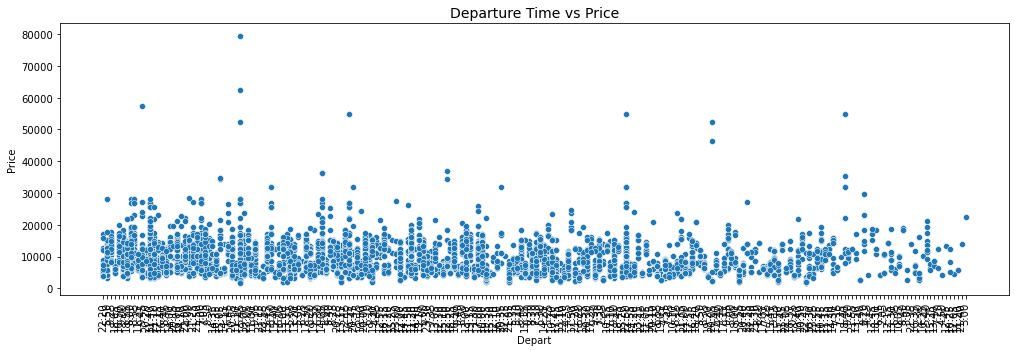

In [252]:
plt.figure(figsize=(17,5))
sns.scatterplot(df['Depart'], df['Price'], palette='pastel1')
plt.title('Departure Time vs Price', size=14)
plt.xticks(rotation=90)
plt.show()

*Observation :*<br>*In Price is highest in the range 0 to 15000for every Depture hours*

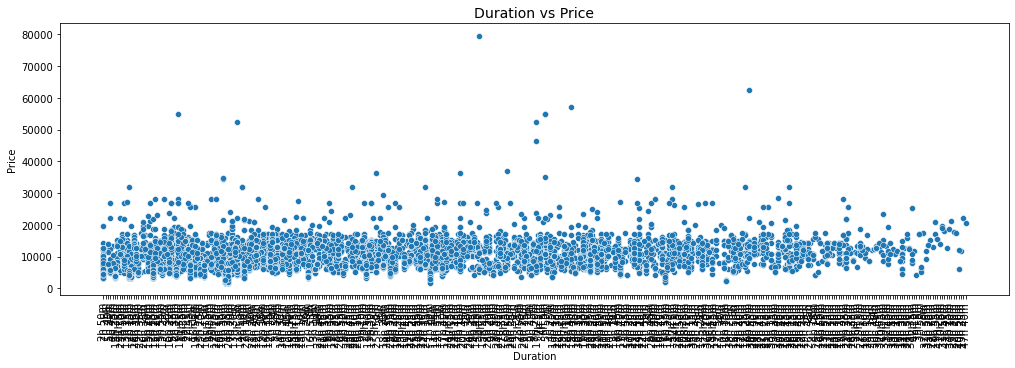

In [253]:
plt.figure(figsize=(17,5))
sns.scatterplot(df['Duration'], df['Price'], palette='Set2')
plt.title('Duration vs Price', size=14)
plt.xticks(rotation=90)
plt.show()

*Observation :*<br>*In Price is maximum between 0 to 20000  and rest have 25000 to 80000 least count for Duration column*

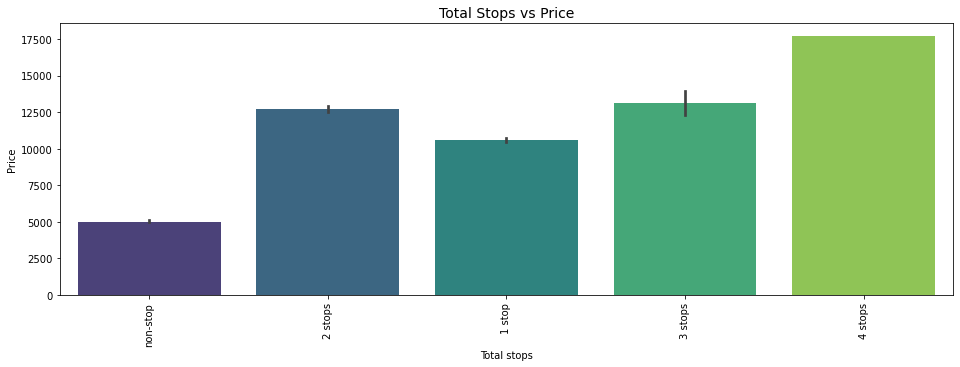

In [254]:
plt.figure(figsize=(16,5))
sns.barplot(df['Total stops'], df['Price'], palette='viridis')
plt.title('Total Stops vs Price', size=14)
plt.xticks(rotation=90)
plt.show()

*Observation :*<br>*price increase with the stops increase*

###### Handling Outliers

In [866]:
fout =['Price']
for f in fout:
    q1 = df[f].quantile(0.25)
    q3 = df[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df.loc[df[f]<lolimit,f] = lolimit
    df.loc[df[f]>uplimit,f] = uplimit

In [867]:
#Recheck for Outliers After Removing

<AxesSubplot:>

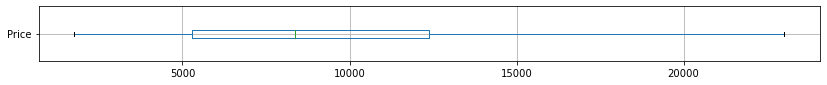

In [868]:
df.boxplot(column='Price', figsize=(14,1),vert=False)

In [869]:
df.shape

(10683, 9)

###### Handling Missing/Zeros Values

In [870]:
print (df['Total stops'].loc[df['Total stops'].isnull()])
df=df.drop(index=9044)


9039    NaN
Name: Total stops, dtype: object


In [871]:
#Recheck null values

In [872]:
print(df['Price'].isnull().sum().sum())

0


###### Handling Duplicate Rows

In [873]:
sum(df.duplicated())

220

In [874]:
# Removing duplicate rows
df=df.drop_duplicates()

In [875]:
df.shape

(10462, 9)

###### Encoding Categorical Variable

In [876]:
df.head()

,Airline,Date,Source,Destination,Depart,Arr,Duration,Total stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,3/22/2021 1:10,2h 50m,non-stop,3897.0
1,Air India,1/5/2019,Kolkata,Banglore,5:50,13:15,7h 25m,2 stops,7662.0
2,Jet Airways,9/6/2019,Delhi,Cochin,9:25,6/10/2021 4:25,19h,2 stops,13882.0
3,IndiGo,12/5/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218.0
4,IndiGo,1/3/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302.0


In [877]:
df.shape

(10462, 9)

In [878]:
le=LabelEncoder()
df['Total stops']=le.fit_transform(df['Total stops'])

In [879]:
source =df[["Source"]]
source =pd.get_dummies(source, drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [880]:
destination = df[["Destination"]]
destination = pd.get_dummies(destination, drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [881]:
df[['Duration_hr','Duration_min']]=df.Duration.str.split(" ",expand=True)
indexNames = df[df['Duration_hr'] == '5m'].index
df.drop(indexNames , inplace=True)
df['Duration_hr']=df['Duration_hr'].str.replace('h',' ')
df['Duration_min']=df['Duration_min'].str.replace('m',' ')

In [882]:
df["Duration_hr"]= df["Duration_hr"].astype(float)
df["Duration_min"]= df["Duration_min"].astype(float)
df['Duration_min']=df['Duration_min'].replace(np.nan,0)
df['Duration(min)']=(df['Duration_hr']*60)+df['Duration_min']
df.drop(["Duration_hr","Duration_min","Duration"],inplace=True,axis=1)

In [883]:
df.drop(["Airline","Source","Destination","Date","Arr","Depart"], axis=1, inplace=True)

In [884]:
final_df = pd.concat([df,source,destination], axis=1).reset_index(drop = True)

In [885]:
final_df.head()

,Total stops,Price,Duration(min),Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4.0,3897.0,170.0,0,0,0,0,0,0,0,0,1
1,1.0,7662.0,445.0,0,0,1,0,0,0,0,0,0
2,1.0,13882.0,1140.0,0,1,0,0,1,0,0,0,0
3,0.0,6218.0,325.0,0,0,1,0,0,0,0,0,0
4,0.0,13302.0,285.0,0,0,0,0,0,0,0,0,1


In [886]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total stops            10461 non-null  float64
 1   Price                  10461 non-null  float64
 2   Duration(min)          10461 non-null  float64
 3   Source_Chennai         10462 non-null  uint8  
 4   Source_Delhi           10462 non-null  uint8  
 5   Source_Kolkata         10462 non-null  uint8  
 6   Source_Mumbai          10462 non-null  uint8  
 7   Destination_Cochin     10462 non-null  uint8  
 8   Destination_Delhi      10462 non-null  uint8  
 9   Destination_Hyderabad  10462 non-null  uint8  
 10  Destination_Kolkata    10462 non-null  uint8  
 11  Destination_New Delhi  10462 non-null  uint8  
dtypes: float64(3), uint8(9)
memory usage: 337.3 KB


In [887]:
print (final_df['Price'].loc[final_df['Price'].isnull()])
final_df=final_df.drop(index=6397)


6397   NaN
Name: Price, dtype: float64


In [888]:
final_df.isnull().sum()

Total stops              0
Price                    0
Duration(min)            0
Source_Chennai           0
Source_Delhi             0
Source_Kolkata           0
Source_Mumbai            0
Destination_Cochin       0
Destination_Delhi        0
Destination_Hyderabad    0
Destination_Kolkata      0
Destination_New Delhi    0
dtype: int64

###### Feature Selection

In [889]:
final_df.columns

Index(['Total stops', 'Price', 'Duration(min)', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

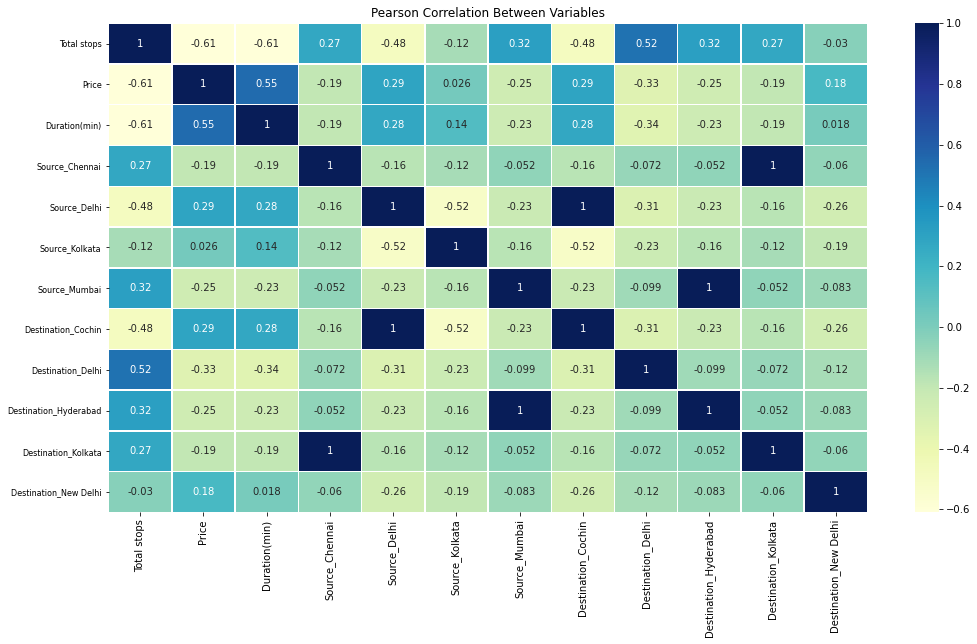

In [890]:
# Variable Correlation
pcorrel = final_df.corr(method='pearson').round(3)
plt.figure(figsize=(17,9)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()         

In [891]:
# Check Strongly Related Features  in train dataset
cor = final_df.corr()
cor_target = abs(cor["Price"])
strong_related = cor_target[cor_target>0.2]
print("Strongly Related:\n\n",strong_related,"\n")

weak_related = cor_target[cor_target<0.2]
print("Weak Relates:\n\n",weak_related)

Strongly Related:

 Total stops              0.609606
Price                    1.000000
Duration(min)            0.545472
Source_Delhi             0.291405
Source_Mumbai            0.245723
Destination_Cochin       0.291405
Destination_Delhi        0.331791
Destination_Hyderabad    0.245723
Name: Price, dtype: float64 

Weak Relates:

 Source_Chennai           0.190064
Source_Kolkata           0.026174
Destination_Kolkata      0.190064
Destination_New Delhi    0.176268
Name: Price, dtype: float64


###### split target and feature variables

In [892]:
y_train=final_df[['Price']]
X_train=final_df.drop(['Price'],axis=1)

print("y_train :",y_train.shape)
print("X_train :",X_train.shape)

y_train : (10461, 1)
X_train : (10461, 11)


In [893]:
from sklearn.ensemble import  ExtraTreesRegressor
selection =ExtraTreesRegressor()
selection.fit(X_train,y_train)
selection.feature_importances_

array([5.46052576e-01, 3.49485554e-01, 4.07987946e-05, 1.11610003e-02,
       3.60438710e-03, 5.89023883e-03, 6.21388188e-03, 2.74366149e-02,
       6.53527138e-03, 3.83492720e-05, 4.35413282e-02])

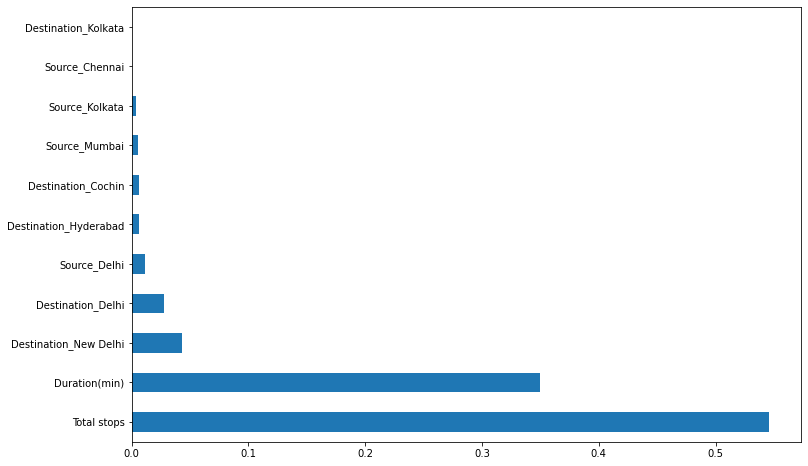

In [894]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,index = X_train.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

In [898]:
X_train.drop(['Source_Chennai','Source_Kolkata','Destination_Kolkata'],inplace=True,axis=1)

In [899]:
#selected features

In [900]:
X_train.columns

Index(['Total stops', 'Duration(min)', 'Source_Delhi', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_New Delhi'],
      dtype='object')

In [901]:
y_train.columns

Index(['Price'], dtype='object')

###### Normilization of data

In [902]:
from sklearn.preprocessing import power_transform
x_train=power_transform(X_train,method='yeo-johnson')
x_train

array([[ 1.2901878 , -1.04758652, -0.84303699, ..., -0.37089056,
        -0.26697371,  3.23385704],
       [ 0.36957438, -0.0278565 , -0.84303699, ..., -0.37089056,
        -0.26697371, -0.30922826],
       [ 0.36957438,  1.07168562,  1.18618757, ..., -0.37089056,
        -0.26697371, -0.30922826],
       ...,
       [ 1.2901878 , -0.98984272, -0.84303699, ...,  2.69621313,
        -0.26697371, -0.30922826],
       [ 1.2901878 , -1.10845043, -0.84303699, ..., -0.37089056,
        -0.26697371,  3.23385704],
       [ 0.36957438,  0.10268017,  1.18618757, ..., -0.37089056,
        -0.26697371, -0.30922826]])

###### Splitting the data in train and test Dataset

In [904]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 144)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5883, 8)
(5883, 1)
(1962, 8)
(1962, 1)


###### Sandardization of data

In [905]:
sc = StandardScaler()
Xtrain = sc.fit_transform(x_train)
print(Xtrain)
Xtest = sc.fit_transform(x_test)
print(Xtest)

[[ 1.28338661 -0.98392856 -0.84212868 ...  2.67150322 -0.26203979
  -0.3100695 ]
 [ 1.28338661 -1.71891878 -0.84212868 ... -0.37432109  3.81621436
  -0.3100695 ]
 [-0.89278316  0.29479785  1.18746698 ... -0.37432109 -0.26203979
  -0.3100695 ]
 ...
 [ 0.84913163  1.53155908 -0.84212868 ... -0.37432109 -0.26203979
   3.22508338]
 [ 1.28338661 -1.20186877 -0.84212868 ... -0.37432109 -0.26203979
  -0.3100695 ]
 [ 0.3647745   0.89278129 -0.84212868 ... -0.37432109 -0.26203979
  -0.3100695 ]]
[[ 1.33092336 -1.20916771 -0.85896512 ... -0.36799004 -0.27183014
  -0.31489627]
 [ 1.33092336 -1.3131085  -0.85896512 ... -0.36799004 -0.27183014
  -0.31489627]
 [-0.86380238  0.7848036  -0.85896512 ... -0.36799004 -0.27183014
  -0.31489627]
 ...
 [-0.86380238  0.94838794 -0.85896512 ... -0.36799004 -0.27183014
  -0.31489627]
 [-0.86380238  1.22614819 -0.85896512 ... -0.36799004 -0.27183014
  -0.31489627]
 [ 1.33092336 -1.11412848 -0.85896512 ...  2.71746488 -0.27183014
  -0.31489627]]


In [906]:
print("y_train :",y_train.shape)
print("X_train :",Xtrain.shape)
print("y_train :",y_test.shape)
print("X_train :",Xtest.shape)

y_train : (5883, 1)
X_train : (5883, 8)
y_train : (1962, 1)
X_train : (1962, 8)


###### Model Building

In [907]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [908]:
#Linear Regression

In [909]:
LRregressor = LinearRegression()
LRregressor.fit(Xtrain, y_train)
LRy_pred = LRregressor.predict(Xtest)
print(LRy_pred)

[[ 5064.13346455]
 [ 4835.03947906]
 [10653.39069831]
 ...
 [11013.94391788]
 [11626.15015394]
 [ 4924.85482804]]


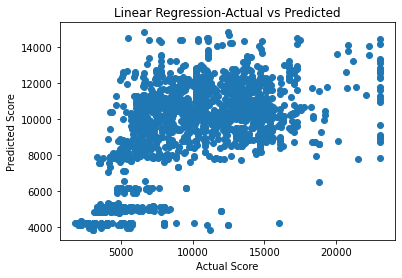

In [910]:
plt.scatter(y_test,LRy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Linear Regression-Actual vs Predicted')
plt.show()

In [911]:
#Evaluation

In [912]:
# Calculating R2 Score
LRr2_score_train =LRregressor.score(Xtrain, y_train)
print('\nr2 Score On Train Data:',LRr2_score_train)
LRr2_score_test=LRregressor.score(Xtest,y_test)
print('\nr2 Score On Test Data:',LRr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, LRy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, LRy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LRy_pred)))


r2 Score On Train Data: 0.45794241594790097

r2 Score On Test Data: 0.44134903192199015


Mean Absolute Error: 2470.031761386129

Mean Squared Error: 10784752.989151713

Root Mean Squared Error: 3284.01476689002


In [913]:
#Validation

In [914]:
LRscores = cross_val_score(LRregressor,Xtrain, y_train, cv=5)
print('\nCross Validation')
print('Linear Regression Score:',LRscores)
LRcross=round(LRscores.mean(),4)
print('Average LinearRegression score:',LRcross)


Cross Validation
Linear Regression Score: [0.44623104 0.46897579 0.49129946 0.43148709 0.44780388]
Average LinearRegression score: 0.4572


In [915]:
#Lasso Regressor

In [916]:
LSregressor = Lasso()
LSregressor.fit(Xtrain, y_train)
LSy_pred = LSregressor.predict(Xtest)
print(LSy_pred)

[ 5068.40224565  4839.41981384 10654.53755916 ... 11014.91521305
 11626.82334499  4927.66431191]


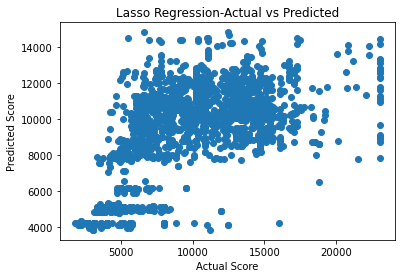

In [917]:
plt.scatter(y_test,LSy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Lasso Regression-Actual vs Predicted')
plt.show()

In [918]:
#Evaluation

In [919]:
# Calculating R2 Score
LSr2_score_train =LSregressor.score(Xtrain, y_train)
print('\nr2 Score On Train Data:',LSr2_score_train)
LSr2_score_test=LSregressor.score(Xtest,y_test)
print('\nr2 Score On Test Data:',LSr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, LSy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, LSy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LSy_pred)))


r2 Score On Train Data: 0.4579420779474328

r2 Score On Test Data: 0.44131244268757064


Mean Absolute Error: 2470.296555017407

Mean Squared Error: 10785459.3440635

Root Mean Squared Error: 3284.122309546875


In [920]:
#validation

In [921]:
LSscores = cross_val_score(LSregressor,Xtrain, y_train, cv=5)
print('\nCross Validation')
print('Lasso Regression Score:',LSscores)
LScross=round(LSscores.mean(),4)
print('Average Lasso Regression score:',LScross)


Cross Validation
Lasso Regression Score: [0.44622922 0.46896406 0.49131092 0.43148962 0.4478064 ]
Average Lasso Regression score: 0.4572


In [922]:
# DecisionTree Regressor

In [923]:
DTregressor =  DecisionTreeRegressor(max_depth=6,criterion='mse')
DTregressor.fit(Xtrain, y_train)
DTy_pred = DTregressor.predict(Xtest)
print(DTy_pred)

[ 4524.86583184  4692.32926829 10603.94638404 ... 10603.94638404
 10603.94638404  4524.86583184]


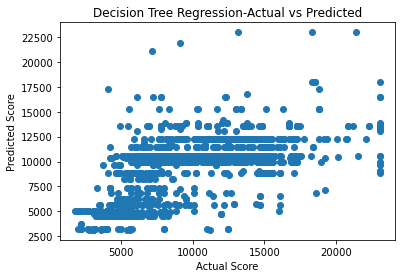

In [924]:
plt.scatter(y_test,DTy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Decision Tree Regression-Actual vs Predicted')
plt.show()

In [925]:
#Evaluation

In [926]:
# Calculating R2 Score
DTr2_score_train =DTregressor.score(Xtrain, y_train)
print('\nr2 Score On Train Data:',DTr2_score_train)
DTr2_score_test=DTregressor.score(Xtest,y_test)
print('\nr2 Score On Test Data:',DTr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test,DTy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test,DTy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,DTy_pred)))



r2 Score On Train Data: 0.5769024042122826

r2 Score On Test Data: 0.47975811911822985


Mean Absolute Error: 2323.034690582597

Mean Squared Error: 10043265.83237587

Root Mean Squared Error: 3169.1112054290347


In [927]:
#Validation

In [928]:
DTscores = cross_val_score(DTregressor,Xtrain, y_train, cv=5)
print('\nCross Validation')
print('Decision Tree Regression Score:',DTscores)

DTcross=round(DTscores.mean(),4)
print('Average Decision Tree Regression score:',DTcross)


Cross Validation
Decision Tree Regression Score: [0.52032312 0.54122407 0.52910282 0.52435657 0.51999553]
Average Decision Tree Regression score: 0.527


In [929]:
#RandomForest Regressor

In [930]:
RFregressor = RandomForestRegressor()
RFregressor.fit(Xtrain, y_train)
RFy_pred = RFregressor.predict(Xtest)
print(RFy_pred)

[ 4247.04660912  4690.16641192  9924.36520467 ... 12899.95321592
 10754.78291836  4184.15922561]


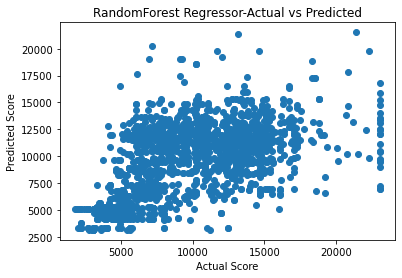

In [931]:
plt.scatter(y_test,RFy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('RandomForest Regressor-Actual vs Predicted')
plt.show()

In [932]:
#Evaluation

In [933]:
# Calculating R2 Score
RFr2_score_train =RFregressor.score(Xtrain, y_train)
print('\nr2 Score On Train Data:',RFr2_score_train)
RFr2_score_test=RFregressor.score(Xtest,y_test)
print('\nr2 Score On Test Data:',RFr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, RFy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, RFy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, RFy_pred)))


r2 Score On Train Data: 0.707626222421802

r2 Score On Test Data: 0.37589852403189694


Mean Absolute Error: 2556.990790698641

Mean Squared Error: 12048274.581242846

Root Mean Squared Error: 3471.0624571221483


In [934]:
#validation

In [935]:
RFscores = cross_val_score(RFregressor,Xtrain, y_train, cv=5)
print('\nCross Validation')
print('Random Forest Regression Score:',RFscores)

RFcross=round(RFscores.mean(),4)
print('Average Random Forest Regression score:',RFcross)


Cross Validation
Random Forest Regression Score: [0.55142846 0.58935814 0.57324032 0.55842729 0.57594435]
Average Random Forest Regression score: 0.5697


In [936]:
#KNeighbors Regressor

In [937]:
KNNregressor =  KNeighborsRegressor(n_neighbors=2)
KNNregressor.fit(Xtrain, y_train)
KNNy_pred = KNNregressor.predict(Xtest)
print(KNNy_pred)

[[ 5085. ]
 [ 5312.5]
 [ 9663. ]
 ...
 [13758.5]
 [10437.5]
 [ 4514. ]]


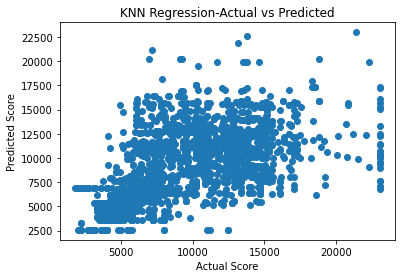

In [938]:
plt.scatter(y_test,KNNy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('KNN Regression-Actual vs Predicted')
plt.show()

In [939]:
#Evaluation

In [940]:
# Calculating R2 Score
KNNr2_score_train =KNNregressor.score(Xtrain, y_train)
print('\nr2 Score On Train Data:',KNNr2_score_train)
KNNr2_score_test=KNNregressor.score(Xtest,y_test)
print('\nr2 Score On Test Data:',KNNr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, KNNy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, KNNy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, KNNy_pred)))


r2 Score On Train Data: 0.5910154147024029

r2 Score On Test Data: 0.2778412452199941


Mean Absolute Error: 2743.3496432212028

Mean Squared Error: 13941269.655453619

Root Mean Squared Error: 3733.800966234491


In [941]:
#Validation

In [942]:
KNNscores = cross_val_score(KNNregressor,Xtrain, y_train, cv=5)
print('\nCross Validation')
print('KNN Regression Score:',KNNscores)
KNNcross=round(KNNscores.mean(),4)
print('Average KNN Regression score:',KNNcross)


Cross Validation
KNN Regression Score: [0.44258314 0.41549563 0.47945546 0.42644245 0.45945632]
Average KNN Regression score: 0.4447


In [943]:
#Ridge Regressor

In [944]:
RRregressor =  Ridge()
RRregressor.fit(Xtrain, y_train)
RRy_pred = RRregressor.predict(Xtest)
print(RRy_pred)

[[ 5064.82444194]
 [ 4835.80276571]
 [10653.22464789]
 ...
 [11013.66406553]
 [11625.67707007]
 [ 4924.94638698]]


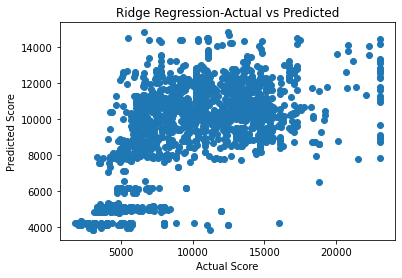

In [945]:
plt.scatter(y_test,RRy_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Ridge Regression-Actual vs Predicted')
plt.show()

In [946]:
#Evaluation

In [947]:
# Calculating R2 Score
RRr2_score_train =RRregressor.score(Xtrain, y_train)
print('\nr2 Score On Train Data:',RRr2_score_train)
RRr2_score_test=RRregressor.score(Xtest,y_test)
print('\nr2 Score On Test Data:',RRr2_score_test)

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, RRy_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, RRy_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, RRy_pred)))


r2 Score On Train Data: 0.4579424016551915

r2 Score On Test Data: 0.441346079601306


Mean Absolute Error: 2470.0941231073557

Mean Squared Error: 10784809.983681647

Root Mean Squared Error: 3284.0234444476255


In [948]:
#Validation

In [949]:
RRscores = cross_val_score(RRregressor,Xtrain, y_train, cv=5)
print('\nCross Validation')
print('Ridge Regression Score:',RRscores)
RRcross=round(RRscores.mean(),4)
print('Average Ridge Regression score:',RRcross)


Cross Validation
Ridge Regression Score: [0.44622998 0.46897129 0.49129474 0.43149068 0.44781174]
Average Ridge Regression score: 0.4572


###### Compare Models

In [950]:
trainscore=[LRr2_score_train,LSr2_score_train,RRr2_score_train,DTr2_score_train,RFr2_score_train,KNNr2_score_train]
testscore=[LRr2_score_test,LSr2_score_test,RRr2_score_test,DTr2_score_test,RFr2_score_test,KNNr2_score_test]
VAlscore=[LRcross,LScross,RRcross,DTcross,RFcross,KNNcross]
col={'Train Score':trainscore,'Test Score':testscore,'Validation':VAlscore}
models=['Linear Regression','Lasso','Ridge','Decision Tree','Random Forest','KNN']
dfp=pd.DataFrame(data=col,index=models)
dfp

,Train Score,Test Score,Validation
Linear Regression,0.457942,0.441349,0.4572
Lasso,0.457942,0.441312,0.4572
Ridge,0.457942,0.441346,0.4572
Decision Tree,0.576902,0.479758,0.5270
Random Forest,0.707626,0.375899,0.5697
KNN,0.591015,0.277841,0.4447


<AxesSubplot:>

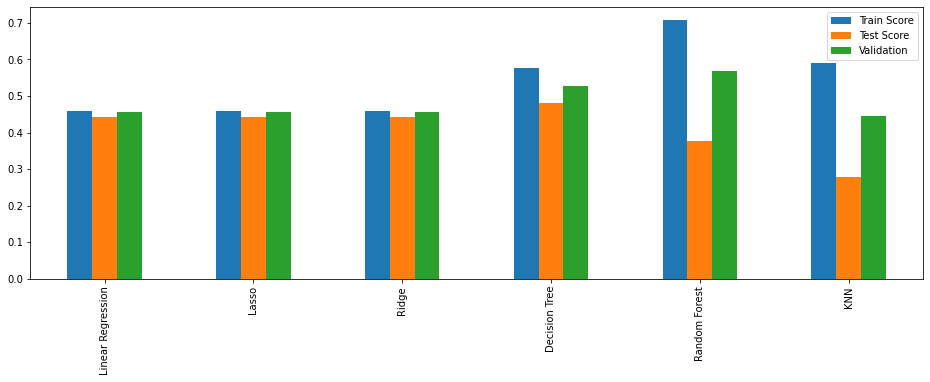

In [951]:
dfp.plot(kind='bar',figsize=(16,5))

###### Hyperparameter Tunining

In [ ]:
#for Linear Regression

In [954]:
fit_intercept=[True,False]
normalize=[True,False]
copy_X=[True,False]
positive=[True,False]
n_jobs= [1,5,10, 100,200,500]
param_distributions = dict(fit_intercept=fit_intercept,
                           normalize=normalize,
                           copy_X=copy_X,
                           positive=positive,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=LRregressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Score:  0.4571594522758901
Best Params:  {'positive': False, 'normalize': False, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}


In [955]:
#for Random Forest Regressor

In [956]:
n_estimators=[10, 50,5,90, 200, 110, 500]
criterion = ['mse','mae']
max_depth = [2,4,6,8,10]
min_samples_split=[1,5,3,1.5,3.9,10]
min_samples_leaf=[0.0,0.5]
min_weight_fraction_leaf=[1.4,3.5,1.2,0.5]
max_features=['auto','sqrt','log2']
max_leaf_nodes=[4,6,12,10,25,50]
verbose = [1,5,4,10,15]
random_state= [1,5,10, 100,200,500]
n_jobs= [1,5,10, 100,200]

param_distributions = dict(n_estimators=n_estimators,
                           criterion = criterion,
                           max_depth = max_depth,
                           min_samples_split=min_samples_split,
                           min_samples_leaf=min_samples_leaf,
                           min_weight_fraction_leaf=min_weight_fraction_leaf,
                           max_features=max_features,
                           max_leaf_nodes=max_leaf_nodes,
                           verbose = verbose,
                           random_state= random_state,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=RFregressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=100)
random_result = random.fit(Xtrain, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s


building tree 1 of 200building tree 2 of 200building tree 3 of 200
building tree 4 of 200


building tree 5 of 200
building tree 6 of 200building tree 7 of 200building tree 8 of 200


building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200building tree 13 of 200

building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200building tree 18 of 200

building tree 19 of 200building tree 20 of 200

building tree 21 of 200
building tree 22 of 200building tree 23 of 200

building tree 24 of 200
building tree 25 of 200building tree 26 of 200building tree 27 of 200

building tree 28 of 200

building tree 29 of 200
building tree 30 of 200building tree 31 of 200building tree 32 of 200


building tree 33 of 200building tree 34 of 200

building tree 36 of 200building tree 35 of 200
building tree 37 of 200

building tree 38 of 200building tree 39 of 200building tree 40 of 200

building tree 41 of 200building tree 42 of 200


b

[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:    0.1s


building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200building tree 76 of 200

building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81 of 200building tree 82 of 200

building tree 83 of 200
building tree 84 of 200
building tree 85 of 200building tree 86 of 200

building tree 87 of 200
building tree 88 of 200building tree 89 of 200
building tree 90 of 200building tree 91 of 200building tree 92 of 200



building tree 93 of 200
building tree 94 of 200building tree 95 of 200

building tree 96 of 200
building tree 97 of 200
building tree 98 of 200
building tree 99 of 200
building tree 100 of 200
building tree 101 of 200
building tree 102 of 200
building tree 103 of 200
building tree 104 of 200
building tree 105 of 200
building tree 106 of 200
building tree 107 of 200building tree 108 of 200

building tree 109 of 200
buildi

[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 200 out of 200 | elapsed:    0.6s finished


###### Final MOdel

Choosing the Linear Regression as Final Model
It Final Accuracy is higher than other and its the same train Accuracy

In [957]:
y_train=final_df[['Price']]
X_train=final_df.drop(['Price'],axis=1)

print("y_train :",y_train.shape)
print("X_train :",X_train.shape)

y_train : (10461, 1)
X_train : (10461, 8)


In [958]:
PScaler=StandardScaler()
PScalerFit=PScaler.fit(X_train)
x_train=PScalerFit.transform(X_train)
print("x_full data :",x_train.shape)
print("y_full data :",y_train.shape)

x_full data : (10461, 8)
y_full data : (10461, 1)


In [959]:
regressor = LinearRegression(positive=False, normalize=False, n_jobs= 1, fit_intercept= True, copy_X= True)
Final_Model=regressor.fit(x_train,y_train)

# Calculating R2 Score
r2_score =regressor.score(x_train, y_train)
print('Final Score:',r2_score)

Final Score: 0.4484565784274096


###### Model Saving

In [960]:
import pickle
filename='fpp.pk1'
pickle.dump(regressor,open(filename,'wb'))
print("Model Saved")

Model Saved
